In [1]:
# Setup
import sys
sys.path.append('/home/colab/autoencoder-vaegan')

checkpoint_path = '/home/colab/autoencoder-vaegan/checkpoints/checkpoint.ckpt'
batch_size = 8
img_shape = (224, 192)

In [2]:
# imports

%matplotlib inline
import tensorflow as tf
import numpy as np
# import scipy as sp
# import os

from utils import imshow, pixels01, pixels11
from model import Model as M

/home/colab/.conda/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [ ]:
model = M(None, batch_size=batch_size, img_shape=img_shape)

model.build_model()
model.setup_session()

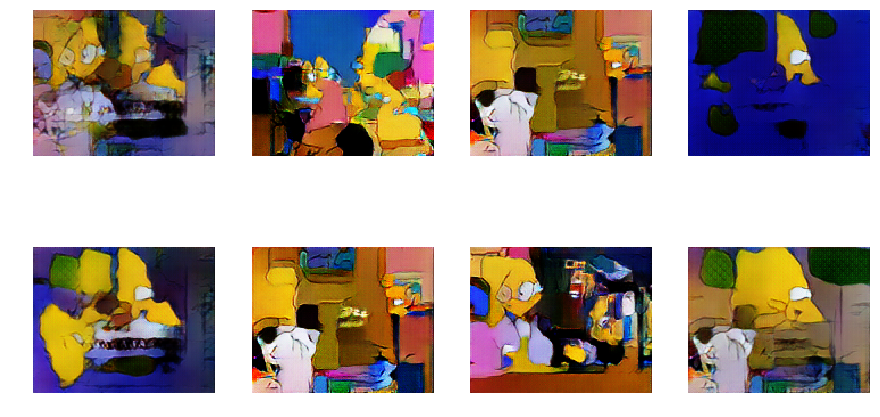

In [5]:
zdraw = np.random.normal(scale=1.0, size=(batch_size, 128)).astype('float32')
imgs = pixels01(model.Gz.eval({ model.Z: zdraw, model.is_training: False }))
imshow(imgs[:8])

In [5]:
# new = np.tile(zdraw[3] + scene, [64,1])
# imgs = pixels01(model.Gz.eval({ model.Z: new, model.is_training: False }))
# imshow(imgs[:8])

In [6]:
# build a generator that uses only the mean from the encoder, rather than picking a random number
# from mean / sigma of encoder. This helps make smooth movies.
Gmean = model.arch.generator(model.E_means, reuse=True)

In [7]:
idx = 1

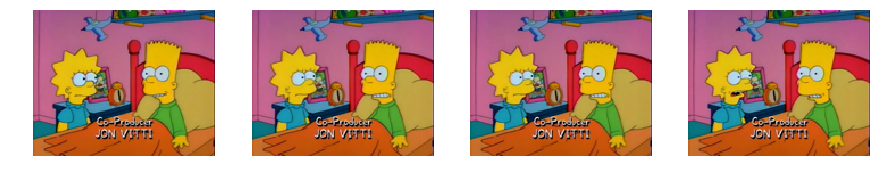

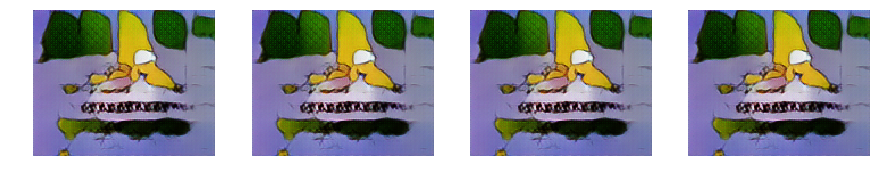

In [83]:
x = model.feed.feed(int(idx//64))
imgs = pixels01(Gmean.eval({ model.X: pixels11(x), model.is_training: False }))
i = idx % 64
imshow(x[i:i+4])
imshow(imgs[i:i+4])
idx += 40

In [33]:
from PIL import Image
import os

from feed import Feed

batches = 500
out_idx = 0
model.feed = Feed(img_directory, batch_size, shuffle=False)
for b in range(batches):
    x = model.feed.feed(b)
    imgs = pixels01(Gmean.eval({ model.X: pixels11(x), model.is_training: False }))
    as_ints = (imgs * 255.0).astype('uint8')
    paths = [os.path.join(movie_out, ('%06d.jpg' % i)) for i in range(out_idx, out_idx+batch_size)]
    for im, p in zip(as_ints, paths):
        Image.fromarray(im).save(p)
    out_idx += batch_size   